# Linear Discriminant Analysis (LDA)

This notebook demonstrates how to apply Linear Discriminant Analysis (LDA) to a real-world dataset.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, seaborn, pandas, and scikit-learn.

In [1]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA

from sklearn.datasets import load_breast_cancer

## Define Colors and Helper Functions

Define custom colors and helper functions for visualization.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#C03B26", # Red
    "#179E86", # Dark Green
    "#44546A", # Gray
]


def render_covariance_matrix(cov_matrix: pd.DataFrame):
    """
    Render the covariance matrix as a heatmap.

    Args:
        cov_matrix (pd.DataFrame): The covariance matrix to be rendered.
    """
    plt.figure(figsize=(8, 6))
    cmap = LinearSegmentedColormap.from_list(
        "custom_green", ["#FFFFFF", "#179E86"])
    columns = df.columns
    sns.heatmap(
        cov_matrix, annot=True, fmt="f", cmap=cmap,
        xticklabels=[columns[0].title(), columns[1].title()],
        yticklabels=[columns[0].title(), columns[1].title()]
    )
    plt.title("Covariance Matrix")


def render_transformation_matrix(matrix: pd.DataFrame):
    """
    Render the transformation matrix as a heatmap.

    Args:
        matrix (pd.DataFrame): The transformation matrix to be rendered.
    """
    plt.figure(figsize=(8, 6))
    cmap = LinearSegmentedColormap.from_list(
        "custom_green", ["#FFFFFF", "#179E86"])
    sns.heatmap(
        matrix, annot=True, fmt="f", cmap=cmap,
        xticklabels=["First Eigenvector", "Second Eigenvector"],
        yticklabels=["X", "Y"]
    )
    plt.title("Transformation Matrix")


def plot_data(df: pd.DataFrame, x_label: str = "mean texture",
              y_label: str = "mean radius"):
    """
    Create a scatter plot to show the relationship between mean radius and mean
    texture, and modifying the circle size to show data overlapping.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be plotted.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
    """
    sns.scatterplot(
        data=df, x=x_label, y=y_label,
        hue=df["target"].map({0: "Malignant", 1: "Benign"}),
        palette=colors[:2][::-1],
        s=50, edgecolor=colors[-1], alpha=0.6
    )
    plt.title(
        "Breast Cancer Dataset (20% Sample)")
    plt.xlabel(x_label.title())
    plt.ylabel(y_label.title())

    x_extra = (df[x_label].max() - df[x_label].min()) * 0.15
    y_extra = (df[y_label].max() - df[y_label].min()) * 0.15
    plt.xlim(
        df[x_label].min() - x_extra,
        df[x_label].max() + x_extra
    )
    plt.ylim(
        df[y_label].min() - y_extra,
        df[y_label].max() + y_extra
    )

    plt.grid(True)
    plt.legend(title="Diagnosis")
    plt.tight_layout()


def plot_classes(df: pd.DataFrame, x_label: str = "mean texture",
                 y_label: str = "mean radius"):
    """
    Create a scatter plot to show the distribution of the classes in the
    dataset.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be plotted.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
    """
    _, axes = plt.subplots(1, 2)

    for i, label in enumerate([x_label, y_label]):
        sns.scatterplot(
            ax=axes[i], data=df,
            x="target", y=label,
            c=[colors[color] for color in df["target"]],
            s=50, edgecolor=colors[-1], alpha=0.6
        )
        axes[i].set_title(
            f"Distribution of {label.title()}")
        axes[i].set_xlabel("")
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["Malignant", "Benign"])
        axes[i].set_xlim(-0.5, 1.5)
        axes[i].set_ylabel(label.title())
        axes[i].spines["top"].set_visible(False)
        axes[i].spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

## Load and Prepare Breast Cancer Dataset

Load the Breast Cancer dataset and select a random 20% sample for analysis.

In [3]:
# Load the Breast Cancer Dataset.
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df[["mean texture", "mean radius"]]
df["target"] = data.target

# Randomly select 20% of the data using a Gaussian distribution.
np.random.seed(42)
sample_indices = np.random.choice(
    df.index, size=int(0.20 * len(df)), replace=False)
df = df.loc[sample_indices].reset_index(drop=True)

## Visualize Class Distribution

Show the distribution of classes for mean texture and mean radius.

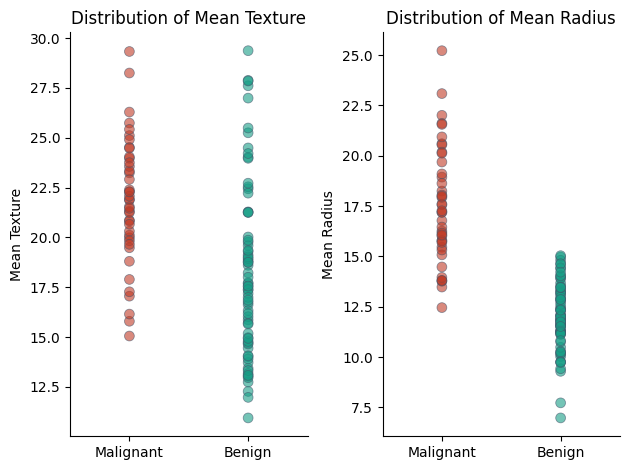

In [4]:
# Show the distribution of the classes.
plot_classes(df)
plt.show()

## Visualize Original Data

Show the relationship between mean radius and mean texture colored by diagnosis.

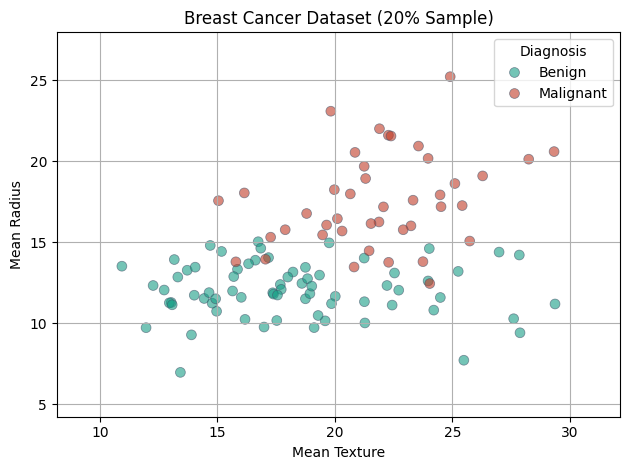

In [5]:
# Show the relationship between mean radius and mean texture.
plot_data(df)
plt.show()

## Apply PCA for Comparison

Apply PCA to demonstrate unsupervised dimensionality reduction without class separation.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_49499/3781673438.py:74: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(


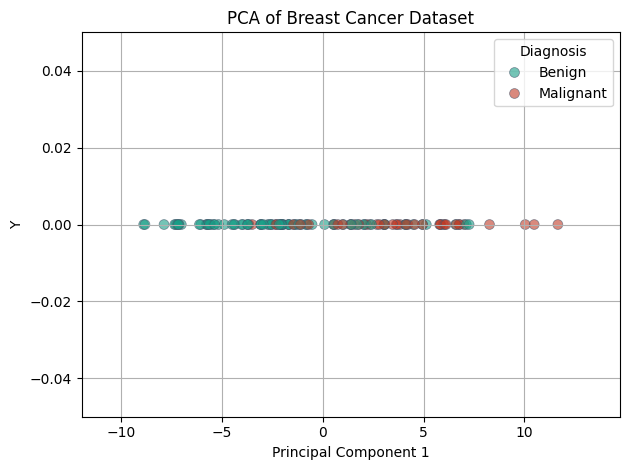

In [6]:
# Apply PCA to the original DataFrame.
# As PCA is an unsupervised learning technique, it does not consider the
# separation of groups when reducing the dimensionality of the data to 1D.
pca = PCA(n_components=1)
X_pca_df = pca.fit_transform(df.drop(columns=["target"]))
df_pca = pd.DataFrame(X_pca_df, columns=["Principal Component 1"])
df_pca["y"] = 0
df_pca["target"] = df["target"]
plot_data(df_pca, "Principal Component 1", "y")
plt.title("PCA of Breast Cancer Dataset")
plt.show()

## Step 1: Standardize the Features

Standardize the features using mathematical operations for mean-centering and scaling.

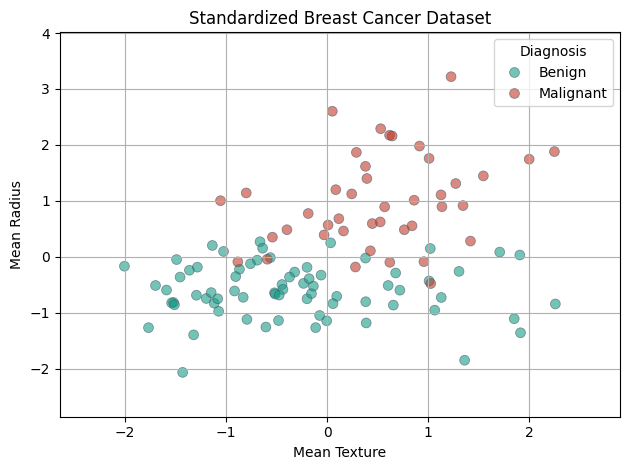

In [7]:
# Step 1: Standardize the Features.
# Standardize the features using mathematical operations.
df.iloc[:, :2] = (df.iloc[:, :2] - df.iloc[:, :2].mean()) / df.iloc[:, :2].std()
plot_data(df)
plt.title("Standardized Breast Cancer Dataset")
plt.show()

## Step 2: Calculate Within-Class Scatter Matrix

Calculate the covariance matrices for each class and combine them into the within-class scatter matrix.

Covariance matrix for Benign group:
 [[ 1.03046275 -0.01760019]
 [-0.01760019  0.23286405]]
Covariance matrix for Malignant group:
 [[0.53952416 0.18244566]
 [0.18244566 0.69396532]]
Within-Class Scatter Matrix:
 [[0.84912507 0.05629062]
 [0.05629062 0.40318074]]


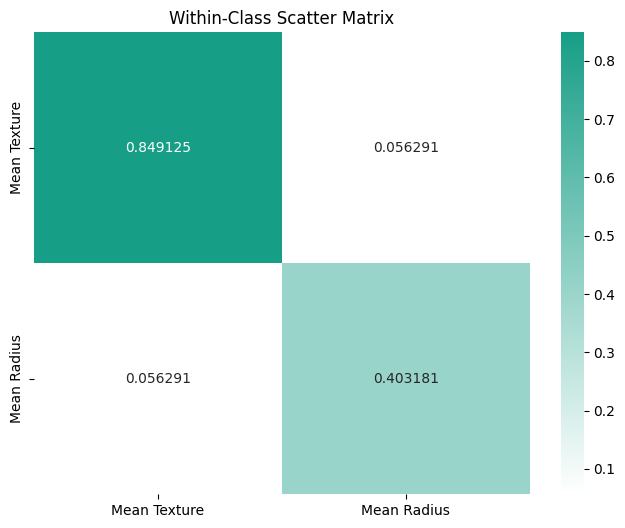

In [8]:
# Step 2: Calculate the Within-Class Scatter Matrix.
# Calculate the covariance matrix for the Benign group.
benign_group = df[df["target"] == 1].iloc[:, :2]
cov_benign = np.cov(benign_group, rowvar=False)
print("Covariance matrix for Benign group:\n", cov_benign)

# Calculate the covariance matrix for the Malignant group.
malignant_group = df[df["target"] == 0].iloc[:, :2]
cov_malignant = np.cov(malignant_group, rowvar=False)
print("Covariance matrix for Malignant group:\n", cov_malignant)

# Calculate the Within-Class Scatter Matrix.
W = ((len(benign_group) - 1) * cov_benign + \
     (len(malignant_group) - 1) * cov_malignant) / (len(df) - 2)
print("Within-Class Scatter Matrix:\n", W)

render_covariance_matrix(W)
plt.title("Within-Class Scatter Matrix")
plt.show()

## Step 3: Calculate Between-Class Scatter Matrix

Calculate the between-class scatter matrix using total covariance minus within-class scatter.

Total covariance matrix:
 [[1.         0.36423616]
 [0.36423616 1.        ]]
Between-Class Scatter Matrix:
 [[0.84912507 0.05629062]
 [0.05629062 0.40318074]]


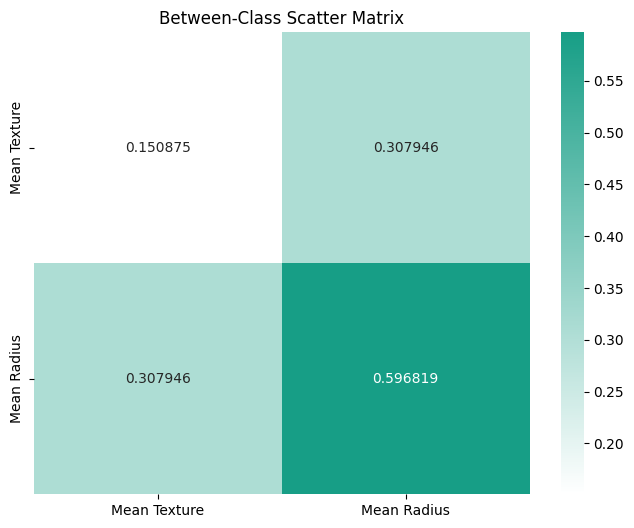

In [9]:
# Step 3: Calculate the Between-Class Scatter Matrix.
# Calculate the total covariance.
T = np.cov(df.iloc[:, :2], rowvar=False)
print("Total covariance matrix:\n", T)

B = T - W
print("Between-Class Scatter Matrix:\n", W)

render_covariance_matrix(B)
plt.title("Between-Class Scatter Matrix")
plt.show()

## Step 4: Calculate Separability Matrix

Calculate the separability matrix by multiplying the inverse of within-class scatter with between-class scatter.

Inverse of the Within-Class Scatter Matrix:
 [[ 1.1886847  -0.16595982]
 [-0.16595982  2.50344793]]
Separability Matrix:
 [[0.12823613 0.26700213]
 [0.74588643 1.44299937]]


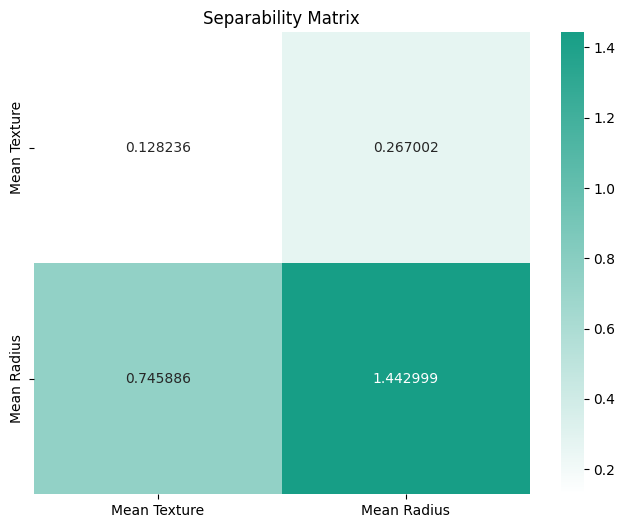

In [10]:
# Step 4: Calculate the Separability Matrix.
# Calculate the inverse of the Within-Class Scatter Matrix.
W_inv = np.linalg.inv(W)
print("Inverse of the Within-Class Scatter Matrix:\n", W_inv)

# Calculate the Separability Matrix.
S = W_inv.dot(B)
print("Separability Matrix:\n", S)

render_covariance_matrix(S)
plt.title("Separability Matrix")
plt.show()

## Calculate Eigenvectors and Eigenvalues

Calculate the eigenvectors and eigenvalues of the separability matrix using SVD.

In [11]:
# Step 3: Calculate the eigenvectors and eigenvalues of the covariance matrix.
_, St, Vt = np.linalg.svd(S, full_matrices=False)
eigenvectors = Vt.T
eigenvalues = St ** 2 / (len(S) - 1)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [2.72625537e+00 7.30132676e-05]
Eigenvectors: [[-0.45834552  0.88877409]
 [-0.88877409 -0.45834552]]


## Visualize Eigenvectors

Plot arrows to illustrate the eigenvectors on the standardized data.

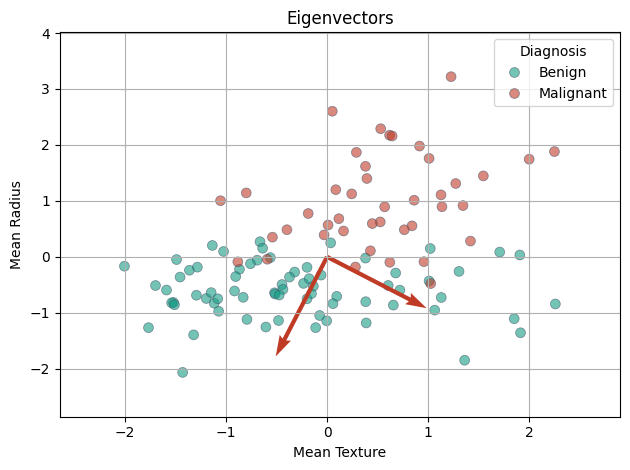

In [12]:
# Plot arrows to illustrate the eigenvectors.
plot_data(df)
origin = np.array([[0, 0], [0, 0]])
plt.quiver(
    *origin, eigenvectors[0, :], eigenvectors[1, :], color=colors[0], scale=5)
plt.title("Eigenvectors")
plt.show()

## Create Transformation Matrix

Sort and select the linear discriminants to create the transformation matrix.

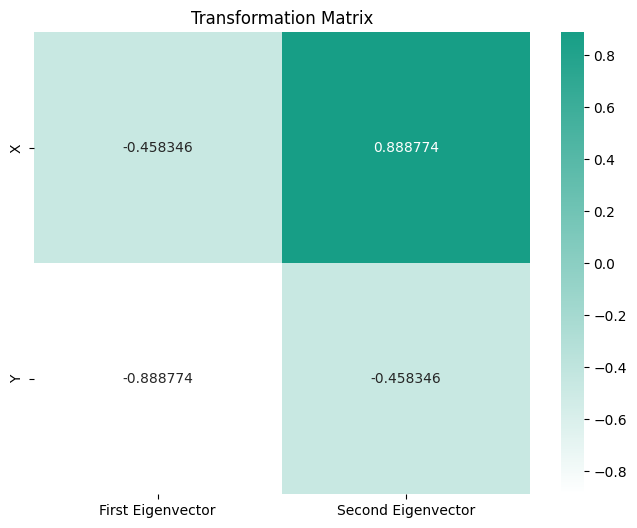

In [13]:
# Step 4: Sort and select the Linear Discriminants.
transformation_matrix = eigenvectors
render_transformation_matrix(transformation_matrix)
plt.show()

## Transform the Data

Transform the data using the transformation matrix to obtain linear discriminants.

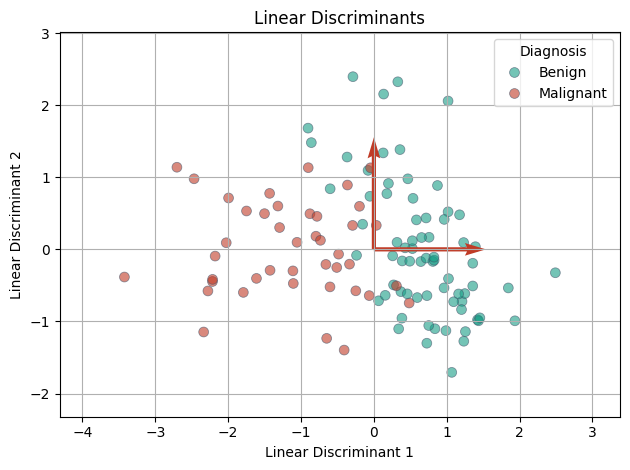

In [14]:
# Step 5: Transform the data using the transformation matrix.
df_transformed = df.iloc[:, :2].dot(transformation_matrix)
df_transformed["target"] = df["target"]
df_transformed.columns = ["Linear Discriminant 1", "Linear Discriminant 2", "target"]
plot_data(df_transformed, "Linear Discriminant 1", "Linear Discriminant 2")

origin = np.array([[0, 0],[0, 0]])
eigenvectors_transformed = eigenvectors.T.dot(transformation_matrix)
plt.quiver(*origin,
           eigenvectors_transformed[0, :],
           eigenvectors_transformed[1, :],
           color=colors[0], scale=5)
plt.title("Linear Discriminants")
plt.show()

## Reduce Dimensionality with LDA

Reduce the dimensionality to 1D using the first linear discriminant, showing clear class separation.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_49499/3781673438.py:74: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(


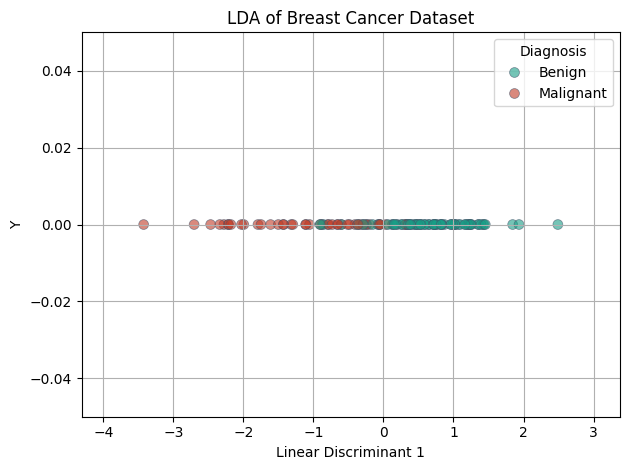

In [15]:
# Step 6: Reduce the dimensionality of the data.
df_reduced = df_transformed.copy()
df_reduced["y"] = 0
plot_data(df_reduced, "Linear Discriminant 1", "y")
plt.title("LDA of Breast Cancer Dataset")
plt.show()